In [1]:
import json
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

import sys
sys.path.append("../../")
from digitalhistopathology.notebooks_utils import sort_retrained_models

# Shannon Entropy for HER2 Dataset

In [2]:
# Load config file 
with open("../../config/config_notebooks_HER2.json", "r") as config_file:
    config = json.load(config_file)

# Ensure the results folder exists
os.makedirs(os.path.join(config['figures_folder'], "shannon_entropy"), exist_ok=True)

In [3]:
# Read Shannon entropy results for each model
shannon_whole = {}
shannon_invasive = {}

list_for_df_shannon = []

# Retrained models with Explora strategy
for p, model_name in zip(config['path_to_retrained_pipelines_1'],
                         config['retrained_model_list1']):
    try:
        with open(os.path.join(p, "shannon_entropy", config['dataset'], "shannon_entropy.json"), "r") as f:
            shannon_entropy = json.load(f)
            shannon_whole[model_name] = shannon_entropy['whole_matrix']['raw_all_patches']
            shannon_invasive[model_name] = shannon_entropy['whole_matrix']['raw_cancer_patches']
            
        list_for_df_shannon.append({
            'model': model_name,
            'shannon_whole': shannon_whole[model_name],
            'shannon_invasive': shannon_invasive[model_name]
        })
    except:
        list_for_df_shannon.append({
            'model': model_name,
            'shannon_whole': 0,
            'shannon_invasive': 0
        })

# Retrained models with Full strategy
for p, model_name in zip(config['path_to_retrained_pipelines_2'],
                         config['retrained_model_list2']):
    try:
        with open(os.path.join(p, "shannon_entropy", config['dataset'], "shannon_entropy.json"), "r") as f:
            shannon_entropy = json.load(f)
            
            shannon_whole[model_name] = shannon_entropy['whole_matrix']['raw_all_patches']
            shannon_invasive[model_name] = shannon_entropy['whole_matrix']['raw_cancer_patches']
            
        list_for_df_shannon.append({
            'model': model_name,
            'shannon_whole': shannon_whole[model_name],
            'shannon_invasive': shannon_invasive[model_name]
        })
    except:
        list_for_df_shannon.append({
            'model': model_name,
            'shannon_whole': 0,
            'shannon_invasive': 0
        })

In [4]:
# Create a dataframe with the results
df_shannon = pd.DataFrame.from_dict(list_for_df_shannon).drop_duplicates()
df_shannon.set_index('model', inplace=True)
df_shannon['diff'] = df_shannon['shannon_invasive'] - df_shannon['shannon_whole']

In [5]:
# Set the models order
retrained_models = config['retrained_model_list1'] + config['retrained_model_list2']
sorted_retrained_models = sort_retrained_models(retrained_models)
df_shannon = df_shannon.loc[[model for model in sorted_retrained_models if model in df_shannon.index]]

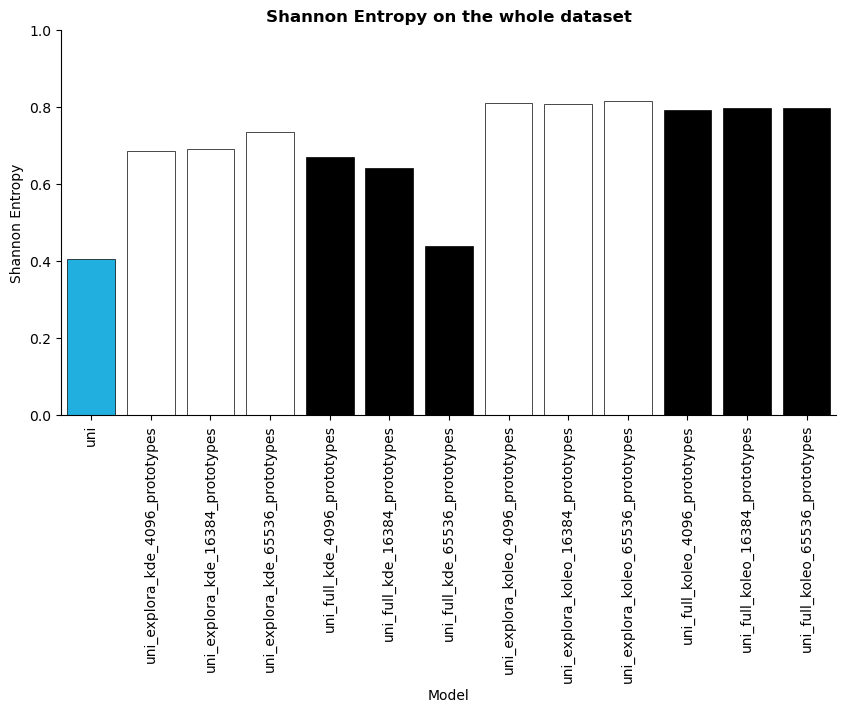

In [6]:
palette = []
for model in df_shannon.index:
    if "explora" in model:
        palette.append("white")
    elif "full" in model:
        palette.append("black")
    else:
        palette.append("deepskyblue")

plt.figure(figsize=(10, 5))

sns.barplot(df_shannon, x=df_shannon.index, y="shannon_whole", hue=df_shannon.index, 
            palette=palette, linewidth=0.5, edgecolor="black", legend=False)

plt.ylabel(r"Shannon Entropy")
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.xlabel(r"Model")
sns.despine()
plt.title("Shannon Entropy on the whole dataset", weight="bold")

plt.savefig(os.path.join(config['figures_folder'], "shannon_entropy", "shannon_entropy_retrained_models_whole.pdf"), bbox_inches='tight', dpi=300)
plt.show()

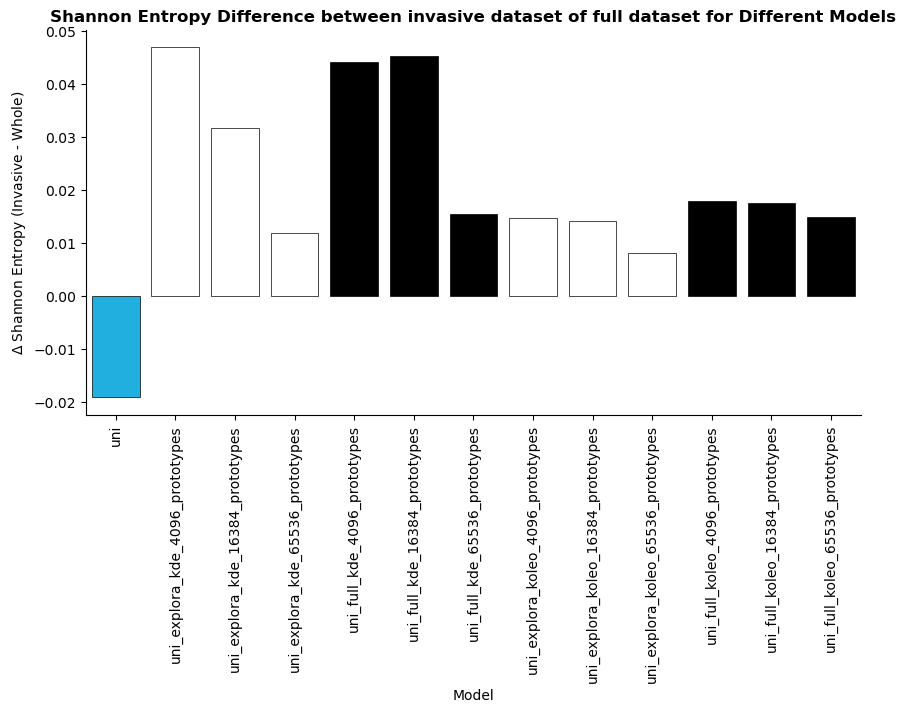

In [7]:
plt.figure(figsize=(10, 5))

sns.barplot(df_shannon, x=df_shannon.index, y="diff", hue=df_shannon.index, 
            palette=palette, linewidth=0.5, edgecolor="black", legend=False)

plt.ylabel(r"$\Delta$ Shannon Entropy (Invasive - Whole)")
plt.xlabel(r"Model")
plt.xticks(rotation=90)
sns.despine()
plt.title("Shannon Entropy Difference between invasive dataset of full dataset for Different Models", weight="bold")

plt.savefig(os.path.join(config['figures_folder'], "shannon_entropy", "shannon_entropy_difference_retrained_models.pdf"), bbox_inches='tight', dpi=300)
plt.show()